<a href="https://colab.research.google.com/github/VictorZani/Computer-Vision-DIO/blob/main/Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import io
from tensorflow import keras

import numpy as np

import seaborn as sns

import pandas as pd

In [22]:
tf.__version__

'2.15.0'

In [24]:
logdir='log'

In [7]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 [==============================] - 0s 0us/step


In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
            y=train_labels,
            epochs=5,
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 39s 20ms/step - loss: 0.1457 - accuracy: 0.9550 - val_loss: 0.0369 - val_accuracy: 0.9869
Epoch 2/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0443 - accuracy: 0.9861 - val_loss: 0.0349 - val_accuracy: 0.9895
Epoch 3/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0331 - accuracy: 0.9897 - val_loss: 0.0334 - val_accuracy: 0.9905
Epoch 4/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0256 - accuracy: 0.9917 - val_loss: 0.0288 - val_accuracy: 0.9919
Epoch 5/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0189 - accuracy: 0.9938 - val_loss: 0.0274 - val_accuracy: 0.9921


In [28]:
y_pred_probs = model.predict(test_images)

y_pred = np.argmax(y_pred_probs, axis=1)

313/313 [==============================] - 2s 6ms/step


In [29]:
classes=[0,1,2,3,4,5,6,7,8,9]

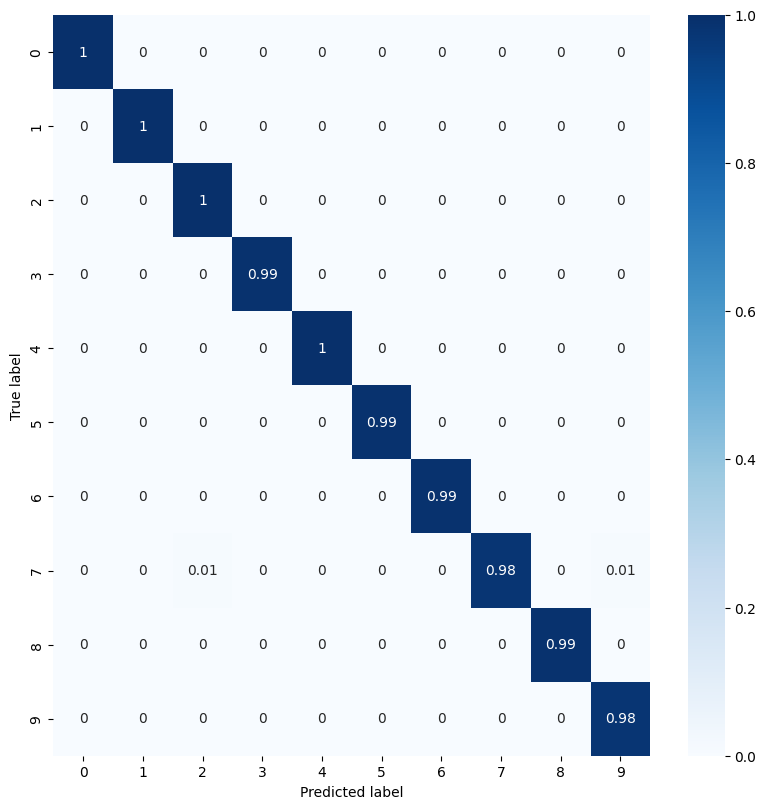

In [36]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Métricas para a classe 0: {'Accuracy': 0.9991, 'Precision': 0.9929, 'Recall (Sensitivity)': 0.998, 'Specificity': 0.9992, 'F1-Score': 0.9954}
Métricas para a classe 1: {'Accuracy': 0.9992, 'Precision': 0.9947, 'Recall (Sensitivity)': 0.9982, 'Specificity': 0.9993, 'F1-Score': 0.9965}
Métricas para a classe 2: {'Accuracy': 0.9978, 'Precision': 0.9828, 'Recall (Sensitivity)': 0.9961, 'Specificity': 0.998, 'F1-Score': 0.9894}
Métricas para a classe 3: {'Accuracy': 0.999, 'Precision': 0.996, 'Recall (Sensitivity)': 0.9941, 'Specificity': 0.9996, 'F1-Score': 0.995}
Métricas para a classe 4: {'Accuracy': 0.999, 'Precision': 0.9939, 'Recall (Sensitivity)': 0.9959, 'Specificity': 0.9993, 'F1-Score': 0.9949}
Métricas para a classe 5: {'Accuracy': 0.9983, 'Precision': 0.9888, 'Recall (Sensitivity)': 0.9922, 'Specificity': 0.9989, 'F1-Score': 0.9905}
Métricas para a classe 6: {'Accuracy': 0.9988, 'Precision': 0.9989, 'Recall (Sensitivity)': 0.9885, 'Specificity': 0.9999, 'F1-Score': 0.9937}
Métri

<ipython-input-38-f51f7afa98f0>:60: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


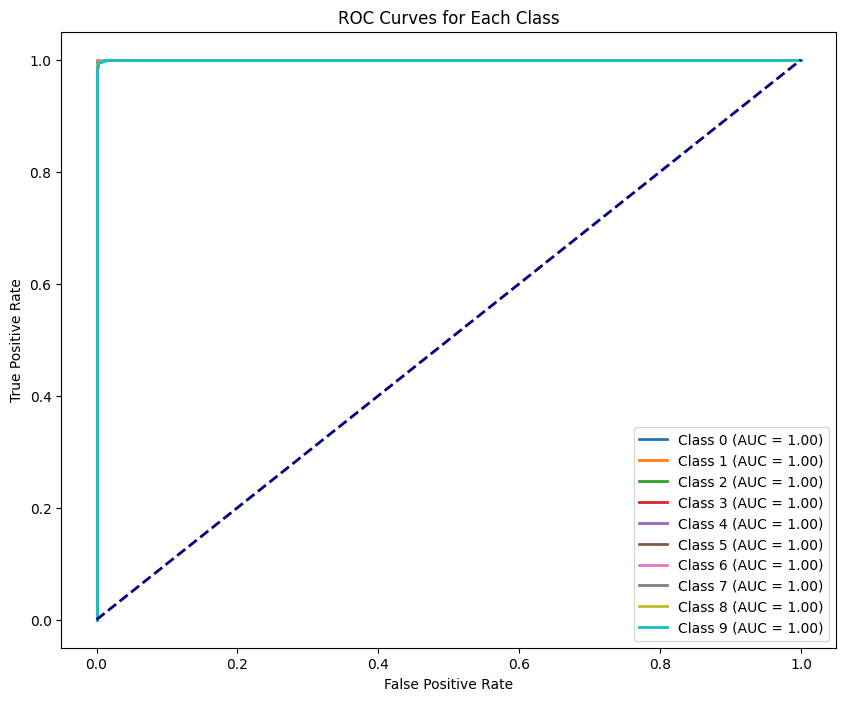

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# 1. Gerar Matriz de Confusão
con_mat = confusion_matrix(test_labels, y_pred)
classes = list(range(10))  # Classes [0-9]

# 2. Calcular Métricas
metrics = {}

for i, class_label in enumerate(classes):
    # VP, FP, FN, VN
    VP = con_mat[i, i]
    FP = con_mat[:, i].sum() - VP
    FN = con_mat[i, :].sum() - VP
    VN = con_mat.sum() - (VP + FP + FN)

    # Cálculo de métricas
    accuracy = (VP + VN) / con_mat.sum()
    precision = VP / (VP + FP) if (VP + FP) > 0 else 0
    recall = VP / (VP + FN) if (VP + FN) > 0 else 0
    specificity = VN / (VN + FP) if (VN + FP) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Armazenar no dicionário
    metrics[class_label] = {
        "Accuracy": round(accuracy, 4),
        "Precision": round(precision, 4),
        "Recall (Sensitivity)": round(recall, 4),
        "Specificity": round(specificity, 4),
        "F1-Score": round(f1_score, 4),
    }

# Exibir métricas
for class_label, metric in metrics.items():
    print(f"Métricas para a classe {class_label}: {metric}")



# 3. Curva ROC Multiclasse
# Binarizar os rótulos para calcular a ROC
y_test_bin = label_binarize(test_labels, classes=classes)
n_classes = y_test_bin.shape[1]

# Calculando probabilidades para as classes (já feito: `y_pred_probs`)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotar todas as curvas ROC
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', n_classes)

for i, color in zip(range(n_classes), colors.colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")  # Linha base
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Each Class")
plt.legend(loc="lower right")
plt.show()
